In [16]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Architecture du réseau
model = Sequential()

# Couches de neurones
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='relu'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

## On définie les valeurs des couches (poids, biais)

In [19]:
# Couche 0
coeff = np.array([[1., -0.5]])
bias = np.array([-1, 1])
weights = [coeff, bias]

model.layers[0].set_weights(weights)

# Couche 1
coeff = np.array([[1.0], [1.0]])
bias = np.array([0])
weights = [coeff, bias]

model.layers[1].set_weights(weights)

In [20]:
# Poids de la couche 1 - et 2 [coefficients, biais]

poidscouche1 = model.layers[0].get_weights()
poidscouche2 = model.layers[1].get_weights()

print(poidscouche1)
print(poidscouche2)

[array([[ 1. , -0.5]], dtype=float32), array([-1.,  1.], dtype=float32)]
[array([[1.],
       [1.]], dtype=float32), array([0.], dtype=float32)]


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x75c880669ab0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


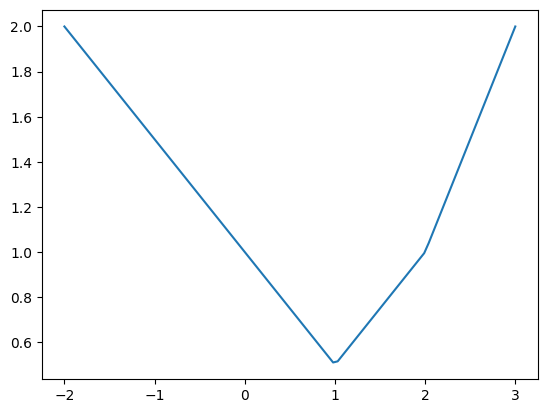

In [21]:
import matplotlib.pyplot as plt

liste_x = np.linspace(-2, 3, num=100)
entry = np.array([[x] for x in liste_x])

sortie = model.predict(entry)

liste_y = np.array([y[0] for y in sortie])

plt.plot(liste_x, liste_y)
plt.show()